## `LION PARCEL CUSTOMER LOAN PROFILE & SEGMENTATION`
**Identifying potential customer segments to focus on in the next marketing period.**

## `INTRODUCTION`
**Name : Argon Riadi** | **Batch : HCK - 004**

## `DASHBOARD LOOKER STUDIO LINKS`

- [LOOKER STUDIO](https://lookerstudio.google.com/reporting/8341e145-00ac-4948-9052-63a50d6e18fc/page/O2ySD/edit)

# `IMPORT LIBRARY`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t

# `DATA PROCESSING`

In [2]:
missing_values = ['n/a', 'na', '--', '? ', ' nan', 'no', ' ?']
df_train = pd.read_csv('lion-loan-train.csv', na_values=missing_values)
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# `DATA EXPLORATION`

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# Missing Value Detection

df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Insight:

From the above data, it can be observed that there are 7 columns in the dataset that have missing values and need to be addressed for further analysis.

In [5]:
df_train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
df_train['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [7]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [8]:
df_train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
df_train['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [10]:
df_train['LoanAmount'].sort_values(ascending=True)

568     9.0
14     17.0
94     25.0
133    25.0
555    26.0
       ... 
479     NaN
524     NaN
550     NaN
551     NaN
605     NaN
Name: LoanAmount, Length: 614, dtype: float64

In [11]:
df_train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [12]:
df_train['Loan_Amount_Term'].sort_values(ascending=True)

497    12.0
546    36.0
262    36.0
242    60.0
68     60.0
       ... 
232     NaN
335     NaN
367     NaN
421     NaN
423     NaN
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [13]:
df_train['ApplicantIncome'].sort_values(ascending=True)

216      150
468      210
600      416
500      645
188      674
       ...  
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, Length: 614, dtype: int64

In [14]:
df_train['Credit_History'].unique()

array([ 1.,  0., nan])

In [15]:
df_train[df_train['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [16]:
df_train.dropna(inplace=True)

In [49]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Insight:

Missing values in the dataset have been handled

In [18]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,480.0,5364.231250,5668.251251,150.0,2898.75,3859.0,5852.50,81000.0
CoapplicantIncome,480.0,1581.093583,2617.692267,0.0,0.00,1084.5,2253.25,33837.0
LoanAmount,480.0,144.735417,80.508164,9.0,100.00,128.0,170.00,600.0
Loan_Amount_Term,480.0,342.050000,65.212401,36.0,360.00,360.0,360.00,480.0
Credit_History,480.0,0.854167,0.353307,0.0,1.00,1.0,1.00,1.0


Insight:

From the above data, it can be observed that in the column "ApplicantIncome," there is a very wide range of data where the smallest customer income is 150 and the largest is 81,000

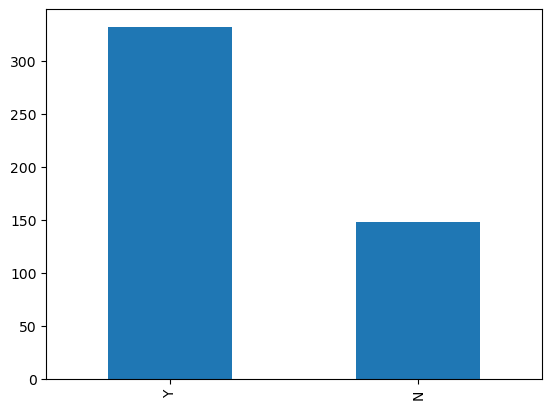

In [19]:
df_train['Loan_Status'].value_counts().plot(kind='bar')
plt.show()

Insight:

From the above data, it is evident that the number of accepted applicants is higher compared to the number of rejected applicants

<AxesSubplot:xlabel='Loan_Status'>

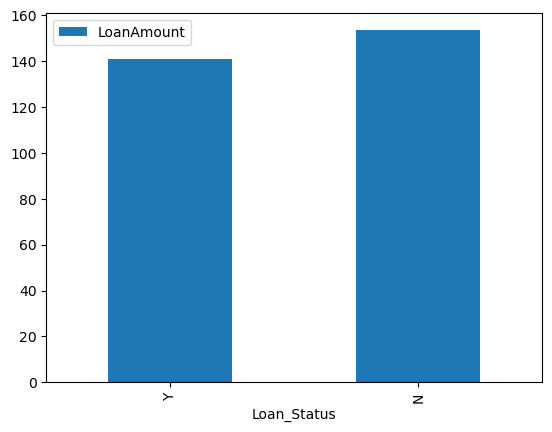

In [57]:
df_train.groupby('Loan_Status')[['LoanAmount']].mean().sort_values(by='LoanAmount').plot(kind='bar')

Insight:

From the above data, it can be observed that the highest number of loans disbursed to customers falls within the range of <=140

<AxesSubplot:xlabel='Loan_Status'>

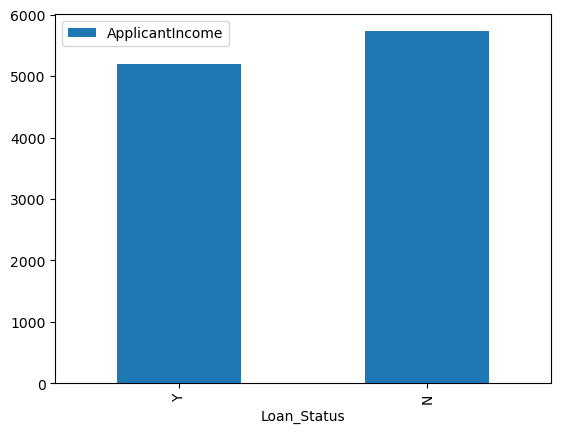

In [56]:
df_train.groupby('Loan_Status')[['ApplicantIncome']].mean().sort_values(by='ApplicantIncome').plot(kind='bar')

Insight:

From the above data, it can be seen that the average income of accepted applicants lies within the range of <=5,000

<AxesSubplot:xlabel='Loan_Status,Gender'>

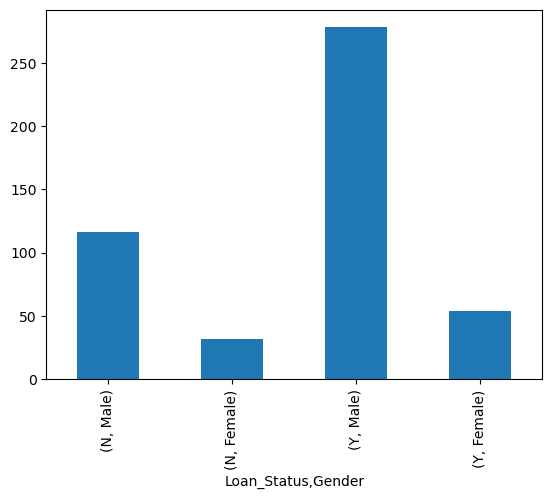

In [23]:
df_train.groupby('Loan_Status')[['Gender']].value_counts().plot(kind='bar')

Insight:

From the above data, it is evident that males constitute the majority of approved applicants

<AxesSubplot:xlabel='Loan_Status,Married'>

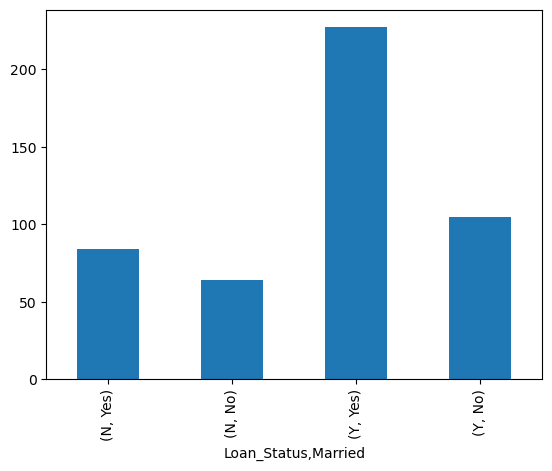

In [24]:
df_train.groupby('Loan_Status')[['Married']].value_counts().plot(kind='bar')

Insight:

From the above data, it can be seen that married applicants are the majority among the approved applicants

<AxesSubplot:xlabel='Loan_Status,Dependents'>

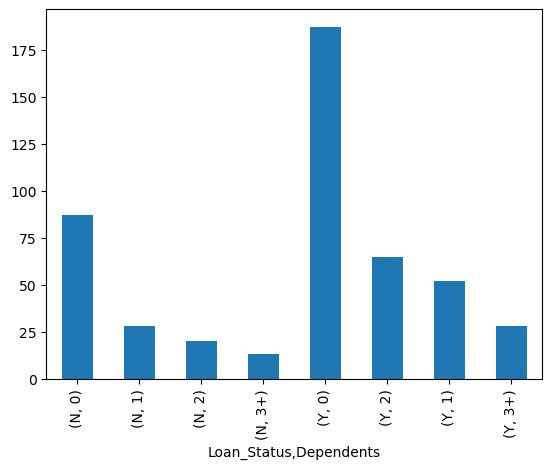

In [25]:
df_train.groupby('Loan_Status')[['Dependents']].value_counts().plot(kind='bar')

Insight:

From the above data, it can be observed that applicants who do not have children or do not live with family members are the majority among the approved applicants

<AxesSubplot:xlabel='Loan_Status,Education'>

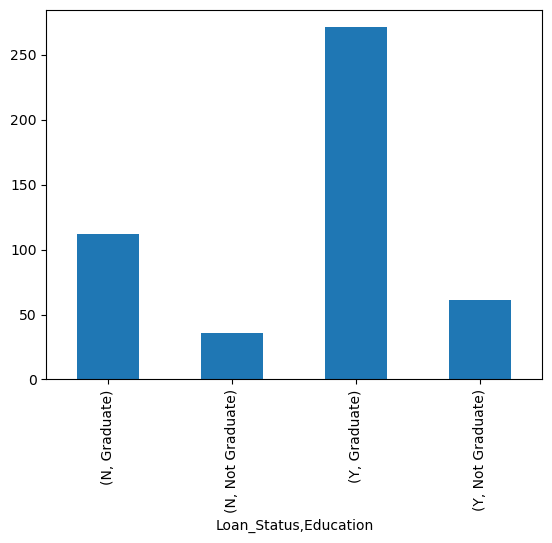

In [26]:
df_train.groupby('Loan_Status')[['Education']].value_counts().plot(kind='bar')

Insight:

From the above data, it is evident that applicants who have completed higher levels of education are the majority among the approved applicants

<AxesSubplot:xlabel='Loan_Status,Self_Employed'>

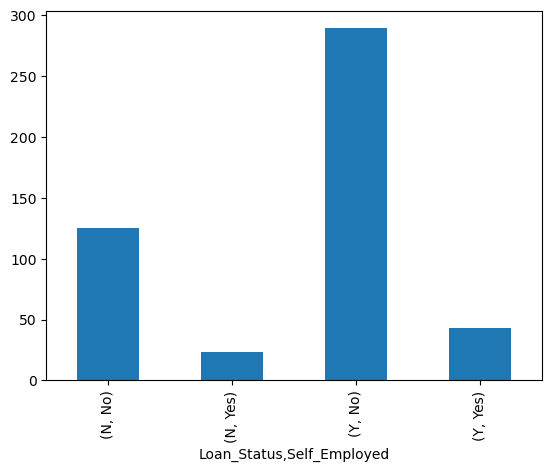

In [27]:
df_train.groupby('Loan_Status')[['Self_Employed']].value_counts().plot(kind='bar')

Insight:

From the above data, it can be seen that applicants who do not have their own business or side ventures are the majority among the approved applicants

<AxesSubplot:xlabel='Loan_Status,Property_Area'>

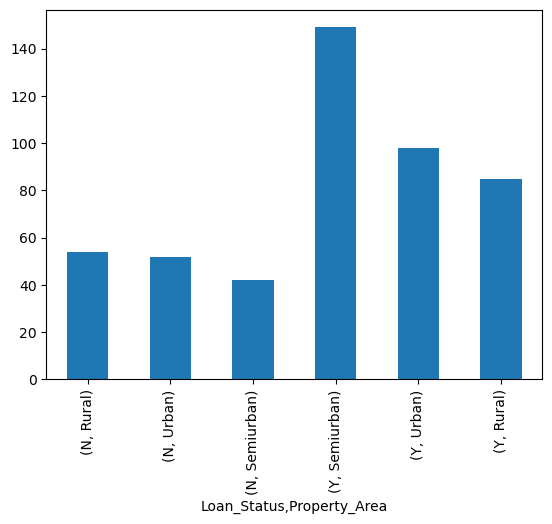

In [28]:
df_train.groupby('Loan_Status')[['Property_Area']].value_counts().plot(kind='bar')

Insight:

From the above data, it can be observed that applicants who reside in semi-urban areas are the majority among the approved applicants

# DESCRIPTIVE STATISTICAL ANALYSIS

In this section, I will calculate the data distribution of the dataset to identify customer segmentation and gain insights into the income range that should be the primary focus for segmenting Lion Parcel Loan customers

In [29]:
df2 = df_train[df_train['Loan_Status'] == 'Y']
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [30]:
df2['ApplicantIncome'].skew()

4.302415687134692

Insight:

From the above data, it can be observed that the dataset of approved applicants has a skewed data distribution

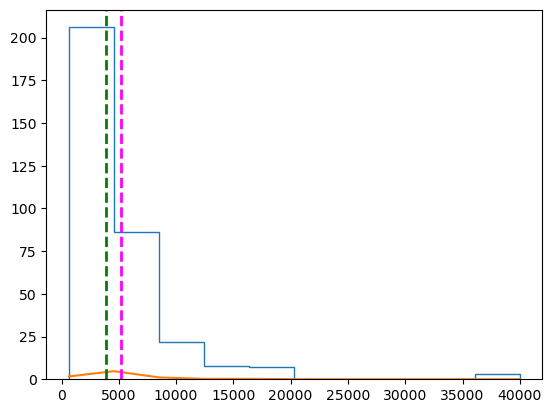

In [31]:
# Visualisasi sebaran dataset dari kolom usia

Income = df2['ApplicantIncome']
density = stats.gaussian_kde(Income)
n, x, _ = plt.hist(Income, histtype='step', bins=10)  
plt.plot(x, density(x)*8**5)
plt.axvline(Income.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(Income.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Insight:

From the above data, it can be seen that the applicant income data is right-skewed, with the majority of applicants having an income range of 0-10,000 and a minority having an income range greater than 10,000

In [50]:
# Find the upper & lower limit

q1 = df2['ApplicantIncome'].quantile(0.25)
q3 = df2['ApplicantIncome'].quantile(0.75)
iqr = q3-q1

lower_limit = q1-(3*iqr)
upper_limit = q3+(3*iqr)

q1,q3,iqr

(2912.75, 5818.25, 2905.5)

In [33]:
lower_limit,upper_limit

(-5803.75, 14534.75)

In [34]:
### Outlier in ApplicantIncome
df_outlier = df2[(df2['ApplicantIncome'] > upper_limit) | (df2['ApplicantIncome'] < lower_limit)]
print('Outlier in ApplicantIncome: ', (len(df_outlier)/len(df_train))*100, '%')

Outlier in ApplicantIncome:  3.5416666666666665 %


Insight:

From the above data, it can be observed that the number of outliers in the column "ApplicantIncome" accounts for approximately 3.54% of the total

In [51]:
# Handling outliers

q1 = df2['ApplicantIncome'].quantile(0.25)
q3 = df2['ApplicantIncome'].quantile(0.75)
iqr = q3-q1

lower_limit = q1-(3*iqr)
upper_limit = q3+(3*iqr)

df3 = df2[~((df2['ApplicantIncome']<(q1-(3*iqr))) | (df2['ApplicantIncome']>(q3+(3*iqr))))]
df3.sort_values(by='ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
418,LP002345,Male,Yes,0,Graduate,No,1025,2773.0,112.0,360.0,1.0,Rural,Y
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
147,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
303,LP001977,Male,Yes,1,Graduate,No,1625,1803.0,96.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,LP001891,Male,Yes,0,Graduate,No,11146,0.0,136.0,360.0,1.0,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
144,LP001508,Male,Yes,2,Graduate,No,11757,0.0,187.0,180.0,1.0,Urban,Y
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y


In [36]:
numcols = ['ApplicantIncome']
for col in numcols:
    print(df3[col].name + ' range: ' + str(df3[col].max() - df3[col].min()))

ApplicantIncome range: 12617


Insight:

From the above data, it can be seen that the range between the highest and lowest applicant incomes is 12,617

In [37]:
print('Variance: ' + str(df3['ApplicantIncome'].var()))
print('Deviasi: ' + str(df3['ApplicantIncome'].std()))

Variance: 5027023.965989284
Deviasi: 2242.102577044432


In [38]:
m_ci = df3['ApplicantIncome'].mean()
s_ci = df3['ApplicantIncome'].std()
dof = len(df3['ApplicantIncome'])-1
confidence = 0.95

In [39]:
t_crit = np.abs(t.ppf(1-confidence,dof))
t_crit

1.649720830999298

In [52]:
# Find confidence interval

ci = stats.norm.interval(0.90, df3['ApplicantIncome'].mean(), df3['ApplicantIncome'].std()/np.sqrt(315))
print(f'the expected value of the population lies between {ci[0]} and {ci[1]}')

the expected value of the population lies between 4178.9927802895345 and 4594.57547367872


Insight

From the data above, it can be observed that the confidence interval suggests that the income range of 4,100 - 4,500 should be the focus of the company as the target market segmentation

<AxesSubplot:xlabel='Loan_Status'>

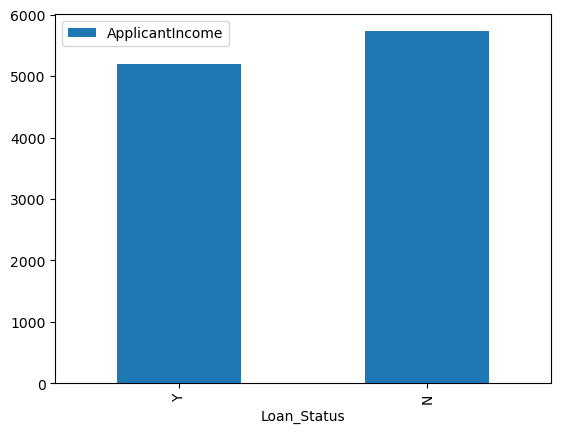

In [54]:
df_train.groupby('Loan_Status')[['ApplicantIncome']].mean().sort_values(by='ApplicantIncome').plot(kind='bar')

## `Conclusion`

Based on the report that has been created, I conclude that from the existing segmentation, the company should focus its target customer segmentation for the next demographic loan on the following category:

- Gender       : Male
- Status       : Newlywed / Married with 0 dependants
- Education    : Graduate
- Occupation   : non Self Employed
- Income range : 4,100 - 4,500
- Residential  : Semi Urban

Due to the fact that the above customer category represents the largest number of customers and has a high loan approval, the company should focus its target customer segmentation on this category.

In [63]:
df_train.to_csv('Lion_Parcel.csv', index=False)